# Preprocessing for Churn Modeling
## Identifying features to convert
As Mark explained in the video, it is preferable to have features like <code>'Churn'</code> encoded as <code>0</code> and <code>1</code> instead of <code>no</code> and <code>yes</code>, so that you can then feed it into machine learning algorithms that only accept numeric values.

Besides <code>'Churn'</code>, other features that are of type <code>object</code> can be converted into 0s and 1s. In this exercise, your job is to explore the different data types of telco in the IPython Shell and identify the ones that are of type <code>object</code>.

In [5]:
# import packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)

# import dataset
telco = pd.read_csv('https://assets.datacamp.com/production/repositories/1764/datasets/79c5446a4a753e728e32b4a67138344847b8f131/Churn.csv')

## Encoding binary features
Recasting data types is an important part of data preprocessing. In this exercise you will assign the values <code>1</code> to <code>'yes'</code> and <code>0</code> to <code>'no'</code> to the <code>'Vmail_Plan'</code> and <code>'Churn'</code> features, respectively.

You saw two approaches to doing this in the video - one using <code>pandas</code>, and the other using <code>scikit-learn</code>. For straightforward tasks like this, sticking with pandas is recommended, so that's what we'll do in this exercise. If you're trying to build machine learning pipelines, on the other hand - which is beyond the scope of this course - you can explore using <code>LabelEncoder()</code>. When doing data science, it's important to be aware that there is always more than one way to accomplish a task, and you need to pick the one that is most effective for your application.

In [6]:
# Replace 'no' with 0 and 'yes' with 1 in 'Vmail_Plan'
telco['Vmail_Plan'] = telco['Vmail_Plan'].replace({"no":0, "yes":1})

# Replace 'no' with 0 and 'yes' with 1 in 'Intl_Plan'
telco['Intl_Plan'] = telco['Intl_Plan'].replace({"no":0, "yes":1})

In [7]:
# Replace 'no' with 0 and 'yes' with 1 in 'Churn'
telco['Churn'] = telco['Churn'].replace({"no":0, "yes":1})

telco['Churn'].head()

0    0
1    0
2    0
3    0
4    0
dtype: int64


/opt/anaconda3/lib/python3.8/site-packages/IPython/lib/pretty.py:700: UserWarning:
Lux defaults to Pandas when there are no valid actions defined.


## One hot encoding
In the video, you saw how the 'State' feature can be encoded numerically using the technique of one hot encoding.

Doing this manually would be quite tedious, especially when you have 50 states and over 3000 customers! Fortunately, <code>pandas</code> has a <code>get_dummies()</code> function which automatically applies one hot encoding over the selected feature.

In [8]:
# Perform one hot encoding on 'State'
telco_state = pd.get_dummies(telco["State"])

telco_state.head()

/opt/anaconda3/lib/python3.8/site-packages/IPython/core/formatters.py:345: UserWarning:
Unexpected error in rendering Lux widget and recommendations. Falling back to Pandas display.
Please report the following issue on Github: https://github.com/lux-org/lux/issues 

/opt/anaconda3/lib/python3.8/site-packages/lux/core/frame.py:700: UserWarning:Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/lux/core/frame.py", line 638, in _repr_html_
    self.maintain_metadata()
  File "/opt/anaconda3/lib/python3.8/site-packages/lux/core/frame.py", line 118, in maintain_metadata
    lux.config.executor.compute_dataset_metadata(self)
  File "/opt/anaconda3/lib/python3.8/site-packages/lux/executor/PandasExecutor.py", line 401, in compute_dataset_metadata
    self.compute_data_type(ldf)
  File "/opt/anaconda3/lib/python3.8/site-packages/lux/executor/PandasExecutor.py", line 407, in compute_data_type
    if attr in ldf._type_override:
TypeError: argument of type 'NoneT

,AK,AL,AR,AZ,CA,CO,CT,DC,DE,FL,GA,HI,IA,ID,IL,IN,KS,KY,LA,MA,MD,ME,MI,MN,MO,MS,MT,NC,ND,NE,NH,NJ,NM,NV,NY,OH,OK,OR,PA,RI,SC,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## Feature scaling
Recall from the video the different scales of the <code>'Intl_Calls'</code> and <code>'Night_Mins'</code> features. Your job in this exercise is to re-scale them using <code>__StandardScaler__</code>.

In your workspace, the <code>telco</code> DataFrame has been subset to only include the features you want to rescale: <code>'Intl_Calls'</code> and <code>'Night_Mins'</code>. To apply <code>StandardScaler</code>, you need to first instantiate it using <code>StandardScaler()</code>, and then apply the <code>fit_transform()</code> method, passing in the DataFrame you want to rescale.

In [9]:
# Import StandardScaler
from sklearn.preprocessing import StandardScaler

# Scale telco using StandardScaler
telco_scaled = StandardScaler().fit_transform(telco[['Intl_Calls', 'Night_Mins']])

# Add column names back for readability
telco_scaled_df = pd.DataFrame(telco_scaled, columns=["Intl_Calls", "Night_Mins"])

# Print summary statistics
print(telco_scaled_df.describe())

## Dropping unnecessary features
Some features such as <code>'Area_Code'</code> and <code>'Phone'</code> are not useful when it comes to predicting customer churn, and they need to be dropped prior to modeling. The easiest way to do so in Python is using the <code>.drop()</code> method of <code>pandas</code> DataFrames.

In [10]:
# Drop the unnecessary features
telco = telco.drop(["Area_Code", "Phone"], axis = 1)

# Verify dropped features
print(telco.columns)

Index(['Account_Length', 'Vmail_Message', 'Day_Mins', 'Eve_Mins', 'Night_Mins',
       'Intl_Mins', 'CustServ_Calls', 'Churn', 'Intl_Plan', 'Vmail_Plan',
       'Day_Calls', 'Day_Charge', 'Eve_Calls', 'Eve_Charge', 'Night_Calls',
       'Night_Charge', 'Intl_Calls', 'Intl_Charge', 'State'],
      dtype='object')


## Engineering a new column
Leveraging domain knowledge to engineer new features is an essential part of modeling. This quote from Andrew Ng summarizes the importance of feature engineering. Your job in this exercise is to create a new feature that contains information about the average length of night calls made by customers.

In [11]:
# Create the new feature
telco['Avg_Night_Calls'] = telco["Night_Mins"] / telco["Night_Calls"]

# Print the first five rows of 'Avg_Night_Calls'
print(telco["Avg_Night_Calls"].head(5))

0    2.689011
1    2.469903
2    1.563462
3    2.212360
4    1.544628
dtype: float64



<ipython-input-11-95bb5d4115e1>:5: UserWarning:
Lux defaults to Pandas when there are no valid actions defined.


# Churn Prediction
## Predicting whether a new customer will churn
Here, the first argument consists of the features, while the second argument is the label that we are trying to predict - whether or not the customer will churn. After you've fitted the model, you can use the model's .predict() method to predict the label of a new customer.

In [12]:
telco.head()

/opt/anaconda3/lib/python3.8/site-packages/IPython/core/formatters.py:345: UserWarning:
Lux defaults to Pandas when there are no valid actions defined.


,Account_Length,Vmail_Message,Day_Mins,Eve_Mins,Night_Mins,Intl_Mins,CustServ_Calls,Churn,Intl_Plan,Vmail_Plan,Day_Calls,Day_Charge,Eve_Calls,Eve_Charge,Night_Calls,Night_Charge,Intl_Calls,Intl_Charge,State,Avg_Night_Calls
0,128,25,265.1,197.4,244.7,10.0,1,0,0,1,110,45.07,99,16.78,91,11.01,3,2.70,KS,2.689011
1,107,26,161.6,195.5,254.4,13.7,1,0,0,1,123,27.47,103,16.62,103,11.45,3,3.70,OH,2.469903
2,137,0,243.4,121.2,162.6,12.2,0,0,0,0,114,41.38,110,10.30,104,7.32,5,3.29,NJ,1.563462
3,84,0,299.4,61.9,196.9,6.6,2,0,1,0,71,50.90,88,5.26,89,8.86,7,1.78,OH,2.212360
4,75,0,166.7,148.3,186.9,10.1,3,0,1,0,113,28.34,122,12.61,121,8.41,3,2.73,OK,1.544628


In [13]:
# Import LogisticRegression
from sklearn.linear_model import LogisticRegression

#choose the feature variables
features = ['Account_Length', 'Vmail_Message', 'Day_Mins', 'Eve_Mins', 
            'Night_Mins', 'Intl_Mins', 'CustServ_Calls', 'Intl_Plan', 
            'Vmail_Plan', 'Day_Calls', 'Day_Charge', 'Eve_Calls', 'Eve_Charge',
            'Night_Calls', 'Night_Charge', 'Intl_Calls', 'Intl_Charge']

# Instantiate the classifier
clf = LogisticRegression()

# Fit the classifier
clf.fit(telco[features], telco['Churn'])

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning:lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


LogisticRegression()

In [14]:
# Predict the label of new_customer
new_customer = telco.loc[958:958, features]
print(clf.predict(new_customer))

[0]


## Training another scikit-learn model
All sklearn models have <code>.fit()</code> and <code>.predict()</code> methods like the one you used in the previous exercise for the <code>LogisticRegression</code> model. This feature allows you to easily try many different models to see which one gives you the best performance. To get you more confident with using the <code>sklearn</code> API, in this exercise you'll try fitting a <code>DecisionTreeClassifier</code> instead of a <code>LogisticRegression</code>.

In [15]:
# Import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

# Instantiate the classifier
clf = DecisionTreeClassifier()

# Fit the classifier
clf.fit(telco[features], telco["Churn"])

# Predict the label of new_customer
print(clf.predict(new_customer))

[0]


## Creating training and test sets
Before you create any model, it is important to split your dataset into two: a training set which will be used to build your churn model, and a test set which will be used to validate your model. To do this, you can use the <code>train_test_split()</code> function from <code>sklearn.model_selection</code>.

In [16]:
# Import train_test_split
from sklearn.model_selection import train_test_split

# Create feature variable
X = telco.drop(['Churn', 'State'], axis=1)

# Create target variable
y = telco['Churn']

# Create training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=314)

## Computing accuracy
Having split your data into training and testing sets, you can now fit your model to the training data and then predict the labels of the test data. That's what you'll practice doing in this exercise.

So far, you've used Logistic Regression and Decision Trees. Here, you'll use a __RandomForestClassifier__, which you can think of as an ensemble of Decision Trees that generally outperforms a single Decision Tree.

In [17]:
# Import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

# Instantiate the classifier
clf = RandomForestClassifier()

# Fit to the training data
clf.fit(X_train, y_train)

# Compute accuracy
print(clf.score(X_test, y_test))

0.947


## Confusion matrix
Using scikit-learn's <code>confusion_matrix()</code> function, you can easily create your classifier's confusion matrix and gain a more nuanced understanding of its performance. It takes in two arguments: The actual labels of your test set - <code>y_test</code> - and your predicted labels.

Important note: sklearn, by default, computes the confusion matrix as follows:
![image](https://assets.datacamp.com/production/repositories/1764/datasets/10b47610640fa55049e99ab294d07bf21ea382ec/Screenshot%202019-05-13%2005.59.04.png)
Notice that the axes are the opposite of what you saw in the video. The metrics themselves remain the same, but keep this in mind when interpreting the table.

![image](https://upload.wikimedia.org/wikipedia/commons/thumb/2/26/Precisionrecall.svg/350px-Precisionrecall.svg.png)

In [18]:
# Import confusion_matrix
from sklearn.metrics import confusion_matrix

y_pred = clf.predict(X_test)

# Print the confusion matrix
print(confusion_matrix(y_test, y_pred))

[[839   6]
 [ 47 108]]


## Varying training set size
The size of your training and testing sets influences model performance. Models learn better when they have more training data. However, there's a risk that they overfit to the training data and don't generalize well to new data, so in order to properly evaluate the model's ability to generalize, you need enough testing data. As a result, there is a important balance and trade-off involved between how much you use for training and how much you hold for testing.

So far, you've used 70% for training and 30% for testing. Let's now use 80% of the data for training and evaluate how that changes the model's performance.

In [19]:
# Import train_test_split
from sklearn.model_selection import train_test_split

# Create feature variable
X = telco.drop(['Churn', 'State'], axis=1)

# Create target variable
y = telco['Churn']

# Create training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [20]:
# Import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

# Instantiate the classifier
clf = RandomForestClassifier()

# Fit to the training data
clf.fit(X_train, y_train)

# Predict the labels of the test set
y_pred = clf.predict(X_test)

# Import confusion_matrix
from sklearn.metrics import confusion_matrix

# Print confusion matrix
print(confusion_matrix(y_test, y_pred))

[[570  10]
 [ 27  60]]


## Computing precision and recall
The sklearn.metrics submodule has many functions that allow you to easily calculate interesting metrics. So far, you've calculated precision and recall by hand - this is important while you develop your intuition for both these metrics.

In practice, once you do, you can leverage the precision_score and recall_score functions that automatically compute precision and recall, respectively. Both work similarly to other functions in sklearn.metrics - they accept 2 arguments: the first is the actual labels (y_test), and the second is the predicted labels (y_pred).

Let's now try a training size of 90%.

In [21]:
# Import train_test_split
from sklearn.model_selection import train_test_split

# Create feature variable
X = telco.drop(['Churn', 'State'], axis=1)

# Create target variable
y = telco['Churn']

# Create training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

# Import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

# Instantiate the classifier
clf = RandomForestClassifier()

# Fit to the training data
clf.fit(X_train, y_train)

# Predict the labels of the test set
y_pred = clf.predict(X_test)

# Import precision_score
from sklearn.metrics import precision_score

# Print the precision
print(precision_score(y_test, y_pred))

0.9411764705882353


In [22]:
# Import recall_score
from sklearn.metrics import recall_score

# Print the recall
print(recall_score(y_test, y_pred))

0.6956521739130435


## ROC curve
Let's now create an ROC curve for our random forest classifier. The first step is to calculate the predicted probabilities output by the classifier for each label using its .predict_proba() method. Then, you can use the roc_curve function from sklearn.metrics to compute the false positive rate and true positive rate, which you can then plot using matplotlib.

A RandomForestClassifier with a training set size of 70% has been fit to the data and is available in your workspace as clf.

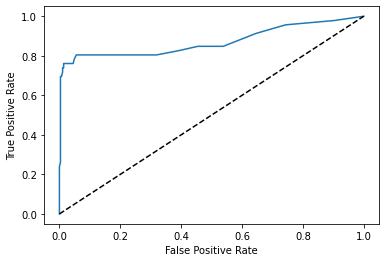

In [23]:
# Generate the probabilities
y_pred_prob = clf.predict_proba(X_test)[:, 1]

# Import roc_curve
from sklearn.metrics import roc_curve

# Calculate the roc metrics
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot the ROC curve
plt.plot(fpr, tpr)

# Add labels and diagonal line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.plot([0, 1], [0, 1], "k--")
plt.show()

## Area under the curve
The ROC curve from the previous exercise is viewable on the right. Visually, it looks like a well-performing model. Let's quantify this by computing the area under the curve.

In [24]:
# Import roc_auc_score
from sklearn.metrics import roc_auc_score

# Print the AUC
print(roc_auc_score(y_test, y_pred_prob))

0.8712635869565217


## F1 score
As you've discovered, there's a tradeoff between precision and recall. Both are important metrics, and depending on how the business is trying to model churn, you may want to focus on optimizing one over the other. Often, stakeholders are interested in a single metric that can quantify model performance. The AUC is one metric you can use in these cases, and another is the F1 score, which is calculated as below:

<code>2 * (precision * recall) / (precision + recall)</code>

The advantage of the F1 score is it incorporates both precision and recall into a single metric, and a high F1 score is a sign of a well-performing model, even in situations where you might have imbalanced classes. In scikit-learn, you can compute the f-1 score using using the <code>f1_score</code> function.

In [25]:
# Instantiate the classifier
clf = RandomForestClassifier()

# Fit to the training data
clf.fit(X_train, y_train)

# Predict the labels of the test set
y_pred = clf.predict(X_test)

# Import f1_score
from sklearn.metrics import f1_score

# Print the F1 score
print(f1_score(y_test, y_pred))

0.7848101265822786


## Tuning the number of features
The default hyperparameters used by your models are not optimized for your data. The goal of grid search cross-validation is to identify those hyperparameters that lead to optimal model performance. In the video, you saw how the random forest's n_estimators hyperparameter was tuned. Here, you'll practice tuning the max_features hyperparameter.

A random forest is an ensemble of many decision trees. The <code>n_estimators</code> hyperparameter controls the number of trees to use in the forest, while the <code>max_features</code> hyperparameter controls the number features the random forest should consider when looking for the best split at decision tree.

In [26]:
# Import GridSearchCV
from sklearn.model_selection import GridSearchCV

# Create the hyperparameter grid
param_grid = {'max_features': ['auto', 'sqrt', 'log2']}

# Call GridSearchCV
grid_search = GridSearchCV(clf, param_grid)

# Fit the model
grid_search.fit(X, y)

# Print the optimal parameters
print(grid_search.best_params_)

{'max_features': 'auto'}


## Tuning other hyperparameters
The power of <code>GridSearchCV</code> really comes into play when you're tuning multiple hyperparameters, as then the algorithm tries out all possible combinations of hyperparameters to identify the best combination. Here, you'll tune the following random forest hyperparameters

In [27]:
# Import GridSearchCV
from sklearn.model_selection import GridSearchCV

# Create the hyperparameter grid
param_grid = {"max_depth": [3, None],
              "max_features": [1, 3, 10],
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}

# Call GridSearchCV
grid_search = GridSearchCV(clf, param_grid)

# Fit the model
grid_search.fit(X,y)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [3, None], 'max_features': [1, 3, 10]})

## Randomized search
In the above chunk of code from the previous exercise, you may have noticed that the first line of code did not take much time to run, while the call to <code>.fit()</code> took several seconds to execute.

This is because <code>.fit()</code> is what actually performs the grid search, and in our case, it was grid with many different combinations. As the hyperparameter grid gets larger, grid search becomes slower. In order to solve this problem, instead of trying out every single combination of values, we could randomly jump around the grid and try different combinations. There's a small possibility we may miss the best combination, but we would save a lot of time, or be able to tune more hyperparameters in the same amount of time.

In scikit-learn, you can do this using <code>__RandomizedSearchCV__</code>. It has the same API as <code>GridSearchCV</code>, except that you need to specify a parameter distribution that it can sample from instead of specific hyperparameter values. Let's try it out now! The parameter distribution has been set up for you, along with a random forest classifier called <code>clf</code>.

In [37]:
# Import RandomizedSearchCV
from random import randint
from sklearn.model_selection import RandomizedSearchCV

# Create the hyperparameter grid
param_dist = {"max_depth": [3, None],
              "max_features": [randint(1, 11)],
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}

# Call RandomizedSearchCV
random_search = RandomizedSearchCV(clf, param_dist)

# Fit the model
random_search.fit(X, y)

# Print best parameters
print(random_search.best_params_)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:278: UserWarning:The total space of parameters 8 is smaller than n_iter=10. Running 8 iterations. For exhaustive searches, use GridSearchCV.


{'max_features': 6, 'max_depth': None, 'criterion': 'entropy', 'bootstrap': True}


## Visualizing feature importances
Your random forest classifier from earlier exercises has been fit to the <code>telco</code> data and is available to you as <code>clf</code>. Let's visualize the feature importances and get a sense for what the drivers of churn are, using <code>matplotlib</code>'s __barh__ to create a horizontal bar plot of feature importances.

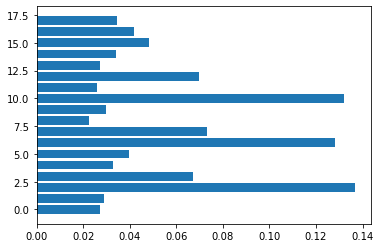

In [38]:
# Calculate feature importances
importances = clf.feature_importances_

# Create plot
plt.barh(range(X.shape[1]), importances)
plt.show()

## Improving the plot
In order to make the plot more readable, we need to do achieve two goals:

- Re-order the bars in ascending order.
- Add labels to the plot that correspond to the feature names.
To do this, we'll take advantage of NumPy indexing. The <code>.argsort()</code> method sorts an array and returns the indices. We'll use these indices to achieve both goals.

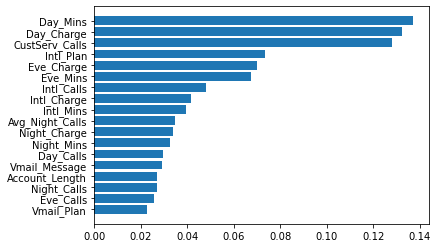

In [40]:
# import numpy
import numpy as np

# Sort importances
sorted_index = np.argsort(importances)

# Create labels
labels = X.columns[sorted_index]

# Clear current plot
plt.clf()

# Create plot
plt.barh(range(X.shape[1]), importances[sorted_index], tick_label=labels)
plt.show()